In [1]:
using Distributions;
using PyPlot;
using StatsBase;

In [2]:
function genotype_matrix(pop_size::Int, num_snps_per_gene::Int, num_genes::Int)
    t = num_snps_per_gene * num_genes # mutational target size

    shape, scale = (0.31, 10) # fixed dfe
    s = rand(Gamma(shape, scale), t) # selective effects
    
    singleton = 1 / (2 * pop_size)
    x = rand(Uniform(singleton, 0.5), t) # maf
    
    gt = rand.(Binomial.(2, x), pop_size)
    X = hcat(gt...) # genotype matrix with dims `pop_size x target_size`
    
    return X, s, x
end


function scale_genotype_matrix(X::Array{Int64,2})

    X_centered = X .- mean(X, 1)
    X_scaled = X_centered ./ std(X, 1)
    
    return X_centered, X_scaled
end

scale_genotype_matrix (generic function with 1 method)

In [3]:
N, m, g = 500000, 100, 22;

X, sel_coeffs, maf = genotype_matrix(N, m, g);

# mutational target size (# of SNPs with non-zero effects)
M = m * g

# observed maf
p = sum(X, 1) ./ (2*N)

# variance of genotypes
X_var = sqrt.(var(X, 1))

# heritability (on the liability scale)
h² = 0.5

# draw effect sizes
β = rand(Normal(0, sqrt.(h²/M)), M)

Xᶜ, Xˢ = scale_genotype_matrix(X)

# genetic and environmental components
G = Xᶜ * β
E = rand(Normal(0, sqrt(1-h²)), N)

# total risk (liability/trait/breeding value)
y = G + E;

In [4]:
extreme, rare, common = percentile.(fill(y,3), [99.99, 99, 95]) # prevalence 0.01%, 1%, 5%

3-element Array{Float64,1}:
 3.03213
 1.90697
 1.34729

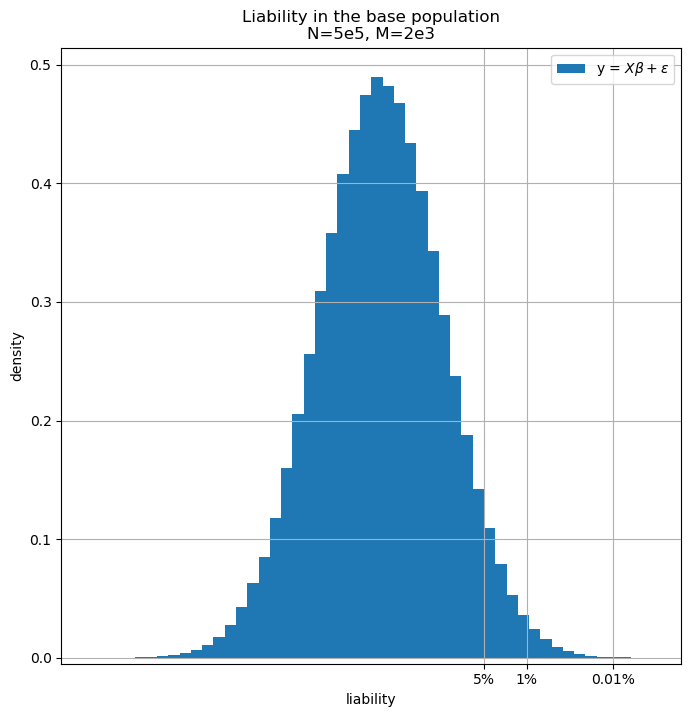

In [5]:
using PyPlot
plt[:figure](figsize=[8,8]);
plt[:title]("Liability in the base population\nN=5e5, M=2e3");
plt[:hist](y, normed=1, bins=50, label=[L"y = $X\beta + \epsilon$"]);

#plt[:vlines]([extreme, rare, common], 0, 0.3, colors=["red", "green", "purple"]);

ax = gca();
ax[:set_xticks]((extreme, rare, common,))
ax[:set_xticklabels](("0.01%", "1%", "5%",))
ax[:set_ylim](bottom=-0.005);

plt[:legend]();
plt[:xlabel]("liability")
plt[:ylabel]("density")
grid("on")